In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
purchase_prices = pd.read_csv('/content/2017PurchasePricesDec.csv')
beg_inv = pd.read_csv('/content/BegInvFINAL12312016.csv')
end_inv = pd.read_csv('/content/EndInvFINAL12312016.csv')
invoice_purchases = pd.read_csv('/content/InvoicePurchases12312016.csv')
purchases = pd.read_csv('/content/PurchasesFINAL12312016.csv')
sales = pd.read_csv('/content/SalesFINAL12312016.csv')


In [5]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']


In [7]:
print("beg_inv Columns:")
print(beg_inv.columns.tolist())

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']


In [8]:
print("end_inv Columns:")
print(end_inv.columns.tolist())

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']


In [9]:
print("invoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']


In [10]:
print("purchases Columns:")
print(purchases.columns.tolist())

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']


In [11]:
print("sales Columns:")
print(sales.columns.tolist())

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


In [12]:
# Checking for missing data in each dataset
datasets = [purchase_prices, beg_inv, end_inv, invoice_purchases, purchases, sales]
dataset_names = ["purchase_prices", "beg_inv", "end_inv", "invoice_purchases", "purchases", "sales"]

for name , data in zip(dataset_names , datasets):
    missing_values = data.isnull().sum()
    non_zero_missing_values = missing_values[missing_values > 0]

    if not non_zero_missing_values.empty:
        print(f"\n Misisng Values in {name}")
        print(non_zero_missing_values)


 Misisng Values in purchase_prices
Description    1
Size           1
Volume         1
dtype: int64

 Misisng Values in end_inv
City    1284
dtype: int64

 Misisng Values in purchases
InvoiceDate       1
PayDate           1
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

 Misisng Values in sales
SalesQuantity     1
SalesDollars      1
SalesPrice        1
SalesDate         1
Volume            1
Classification    1
ExciseTax         1
VendorNo          1
VendorName        1
dtype: int64


In [13]:
purchase_prices.isnull().sum()

Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

In [14]:
purchase_prices[purchase_prices['Description'].isnull()]

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
7915,4202,NaN,0.0,NaN,NaN,1,11.19,480,BACARDI USA INC


In [15]:
purchase_prices.dropna(inplace=True)

In [17]:
purchase_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12260 entries, 0 to 12260
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           12260 non-null  int64  
 1   Description     12260 non-null  object 
 2   Price           12260 non-null  float64
 3   Size            12260 non-null  object 
 4   Volume          12260 non-null  object 
 5   Classification  12260 non-null  int64  
 6   PurchasePrice   12260 non-null  float64
 7   VendorNumber    12260 non-null  int64  
 8   VendorName      12260 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 957.8+ KB


In [18]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236360 entries, 0 to 236359
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InventoryId     236360 non-null  object 
 1   Store           236360 non-null  int64  
 2   Brand           236360 non-null  int64  
 3   Description     236360 non-null  object 
 4   Size            236360 non-null  object 
 5   VendorNumber    236360 non-null  int64  
 6   VendorName      236360 non-null  object 
 7   PONumber        236360 non-null  int64  
 8   PODate          236360 non-null  object 
 9   ReceivingDate   236360 non-null  object 
 10  InvoiceDate     236359 non-null  object 
 11  PayDate         236359 non-null  object 
 12  PurchasePrice   236359 non-null  float64
 13  Quantity        236359 non-null  float64
 14  Dollars         236359 non-null  float64
 15  Classification  236359 non-null  float64
dtypes: float64(4), int64(4), object(8)
memory usage: 28.9+ M

In [19]:

purchases

,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2015-12-21,2016-01-02,2016-01-04,2016-02-16,35.71,6.0,214.26,1.0
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,4.0,37.40,1.0
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-02,2016-01-07,2016-02-21,9.41,5.0,47.05,1.0
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2015-12-22,2016-01-01,2016-01-07,2016-02-21,9.35,6.0,56.10,1.0
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2015-12-24,2016-01-02,2016-01-09,2016-02-16,21.32,5.0,106.60,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236355,79_BALLYMENA_3343,79,3343,Bombay Sapphire Gin,375mL,480,BACARDI USA INC,8877,2016-02-11,2016-02-17,2016-03-01,2016-04-08,9.46,12.0,113.52,1.0
236356,9_BLACKPOOL_8653,9,8653,M & R Extra Dry Vermouth,375mL,480,BACARDI USA INC,8877,2016-02-11,2016-02-17,2016-03-01,2016-04-08,3.53,24.0,84.72,2.0
236357,27_MOUNTMEND_3858,27,3858,Grey Goose Vodka,750mL,480,BACARDI USA INC,8877,2016-02-11,2016-02-16,2016-03-01,2016-04-08,17.77,22.0,390.94,1.0
236358,49_GARIGILL_4245,49,4245,Bacardi Superior Rum,750mL,480,BACARDI USA INC,8877,2016-02-11,2016-02-17,2016-03-01,2016-04-08,7.93,9.0,71.37,1.0


In [20]:
purchases.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
VendorNumber      0
VendorName        0
PONumber          0
PODate            0
ReceivingDate     0
InvoiceDate       1
PayDate           1
PurchasePrice     1
Quantity          1
Dollars           1
Classification    1
dtype: int64

In [21]:
purchases.describe()

,Store,Brand,VendorNumber,PONumber,PurchasePrice,Quantity,Dollars,Classification
count,236360.000000,236360.000000,236360.000000,236360.000000,236359.000000,236359.000000,236359.000000,236359.000000
mean,43.179472,12595.594559,7012.967249,8487.232049,11.682074,13.685665,125.333679,1.447844
std,23.565820,12686.135128,8378.944100,180.786286,26.745977,21.192180,220.544135,0.497273
min,1.000000,58.000000,105.000000,8106.000000,0.380000,1.000000,0.380000,1.000000
25%,23.000000,3663.000000,3252.000000,8326.000000,6.070000,6.000000,46.290000,1.000000
50%,45.000000,6479.000000,4692.000000,8503.000000,8.960000,10.000000,80.400000,1.000000
75%,66.000000,19357.000000,9552.000000,8633.000000,13.840000,12.000000,132.360000,2.000000
max,79.000000,90086.000000,173357.000000,8893.000000,5681.810000,1080.000000,15467.400000,2.000000


In [22]:
beg_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [24]:
beg_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206529 entries, 0 to 206528
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  206529 non-null  object 
 1   Store        206529 non-null  int64  
 2   City         206529 non-null  object 
 3   Brand        206529 non-null  int64  
 4   Description  206529 non-null  object 
 5   Size         206529 non-null  object 
 6   onHand       206529 non-null  int64  
 7   Price        206529 non-null  float64
 8   startDate    206529 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 14.2+ MB


In [25]:
beg_inv.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [26]:
end_inv.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [27]:
end_inv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


In [28]:
end_inv.isnull().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [29]:
end_inv[end_inv['City'].isnull()]

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
113895,46__58,46,NaN,58,Gekkeikan Black & Gold Sake,750mL,0,12.99,2016-12-31
113896,46__62,46,NaN,62,Herradura Silver Tequila,750mL,0,36.99,2016-12-31
113897,46__63,46,NaN,63,Herradura Reposado Tequila,750mL,0,38.99,2016-12-31
113898,46__77,46,NaN,77,Three Olives Espresso Vodka,750mL,0,14.99,2016-12-31
113899,46__106,46,NaN,106,Mr Boston Peach Schnapps,Liter,0,4.49,2016-12-31
...,...,...,...,...,...,...,...,...,...
115174,46__46447,46,NaN,46447,Gascon Malbec Mendoza,750mL,0,10.99,2016-12-31
115175,46__46458,46,NaN,46458,Layer Cake Barosa Shiraz,750mL,0,15.99,2016-12-31
115176,46__46476,46,NaN,46476,Tilia Malbec Mendoza,750mL,0,9.99,2016-12-31
115177,46__46764,46,NaN,46764,Clayhouse Adobe Red Paso Rbl,750mL,0,11.99,2016-12-31


In [30]:
end_inv.dropna(inplace=True)

In [31]:
invoice_purchases.head(2)

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2016-01-04,8124,2015-12-21,2016-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2016-01-07,8137,2015-12-22,2016-02-21,15,140.55,8.57,None


In [32]:
invoice_purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5543 entries, 0 to 5542
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VendorNumber  5543 non-null   int64  
 1   VendorName    5543 non-null   object 
 2   InvoiceDate   5543 non-null   object 
 3   PONumber      5543 non-null   int64  
 4   PODate        5543 non-null   object 
 5   PayDate       5543 non-null   object 
 6   Quantity      5543 non-null   int64  
 7   Dollars       5543 non-null   float64
 8   Freight       5543 non-null   float64
 9   Approval      5543 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 433.2+ KB


In [33]:
invoice_purchases['Total_Amount'] = invoice_purchases['Dollars'] + invoice_purchases['Freight']

In [34]:
invoice_purchases.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
Total_Amount    0
dtype: int64

In [35]:
invoice_purchases['Approval'].value_counts()

None              5169
Frank Delahunt     374
Name: Approval, dtype: int64

In [36]:
invoice_purchases['Approval'].replace(np.nan , None , inplace=True)

In [37]:
invoice_purchases.isnull().sum()

VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
Total_Amount    0
dtype: int64

In [38]:
sales.head()

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,16.49,16.49,1/1/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2.0,32.98,16.49,1/2/2016,750.0,1.0,1.57,12546.0,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,16.49,16.49,1/3/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1.0,14.49,14.49,1/8/2016,750.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2.0,69.98,34.99,1/9/2016,375.0,1.0,0.79,12546.0,JIM BEAM BRANDS COMPANY


In [39]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327673 entries, 0 to 327672
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   InventoryId     327673 non-null  object 
 1   Store           327673 non-null  int64  
 2   Brand           327673 non-null  int64  
 3   Description     327673 non-null  object 
 4   Size            327673 non-null  object 
 5   SalesQuantity   327672 non-null  float64
 6   SalesDollars    327672 non-null  float64
 7   SalesPrice      327672 non-null  float64
 8   SalesDate       327672 non-null  object 
 9   Volume          327672 non-null  float64
 10  Classification  327672 non-null  float64
 11  ExciseTax       327672 non-null  float64
 12  VendorNo        327672 non-null  float64
 13  VendorName      327672 non-null  object 
dtypes: float64(7), int64(2), object(5)
memory usage: 35.0+ MB


In [40]:
sales.describe()

,Store,Brand,SalesQuantity,SalesDollars,SalesPrice,Volume,Classification,ExciseTax,VendorNo
count,327673.000000,327673.000000,327672.000000,327672.00000,327672.000000,327672.000000,327672.000000,327672.000000,327672.000000
mean,21.822765,11830.100066,2.331637,30.35718,15.010765,953.817531,1.409535,1.321094,6980.580983
std,10.570474,12101.152024,3.624801,63.81260,12.133781,721.757894,0.491749,3.348866,8445.146859
min,1.000000,58.000000,1.000000,0.49000,0.490000,50.000000,1.000000,0.010000,105.000000
25%,14.000000,3651.000000,1.000000,10.49000,8.990000,750.000000,1.000000,0.160000,3252.000000
50%,23.000000,6234.000000,1.000000,17.98000,12.990000,750.000000,1.000000,0.680000,4425.000000
75%,32.000000,16837.000000,2.000000,29.99000,17.990000,1500.000000,2.000000,1.570000,9552.000000
max,38.000000,90087.000000,432.000000,7203.69000,469.990000,18000.000000,2.000000,237.040000,173357.000000


In [41]:
sales.isnull().sum()

InventoryId       0
Store             0
Brand             0
Description       0
Size              0
SalesQuantity     1
SalesDollars      1
SalesPrice        1
SalesDate         1
Volume            1
Classification    1
ExciseTax         1
VendorNo          1
VendorName        1
dtype: int64

In [42]:
sales['Total Amount']=sales['SalesDollars']+sales['ExciseTax']

<ipython-input-43-f847ba37f261>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = vc. values , y = vc.index , palette = 'Blues_d')


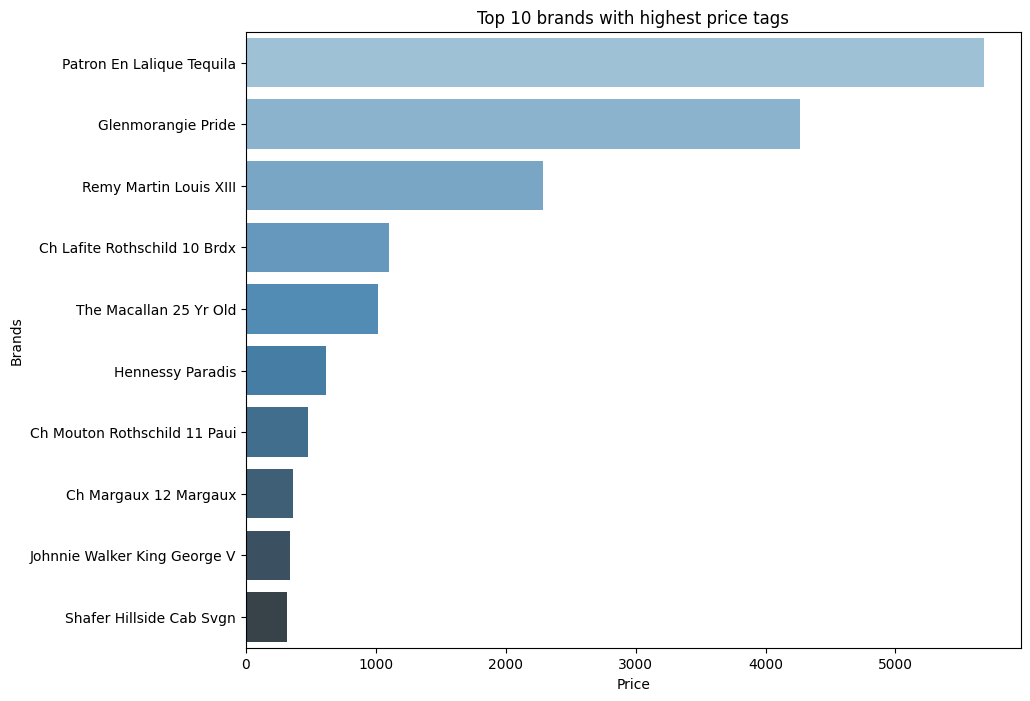

In [43]:
vc = purchases.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending = False)[:10]
plt.figure(figsize = (10 , 8))
ax = sns.barplot(x = vc. values , y = vc.index , palette = 'Blues_d')
plt.title('Top 10 brands with highest price tags')
plt.xlabel('Price')
plt.ylabel('Brands')
plt.show()

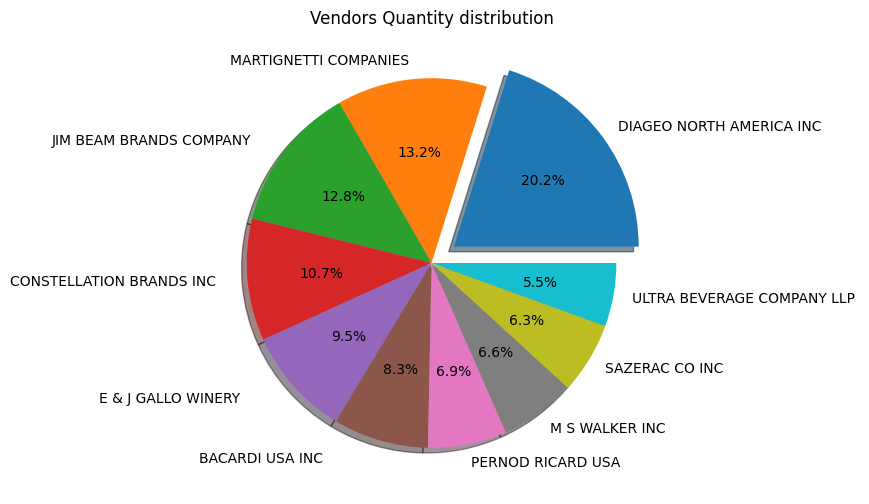

In [44]:
top_10vendor = invoice_purchases.groupby(['VendorName'])['Quantity'].max().sort_values(ascending = False)[:10]
plt.figure(figsize=(6,6))
plt.pie(top_10vendor , labels=top_10vendor.index , autopct = '%1.1f%%' , explode=(0.15,0,0,0,0,0,0,0,0,0),shadow=True)
plt.title('Vendors Quantity distribution')
plt.show()

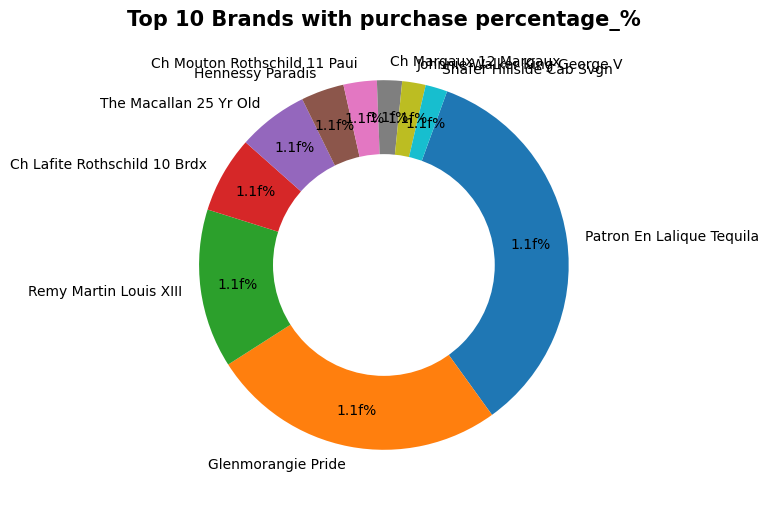

In [45]:
vc = purchases.groupby(['Description'])['PurchasePrice'].max().sort_values(ascending = False)[:10]
plt.figure(figsize = (10 , 6))
ax = plt.gca()
wedges , texts , autotexts = ax.pie (vc.values , labels = vc.index , autopct = '1.1f%%' , pctdistance=0.80, startangle=70,
                                  counterclock=False)

center_circle = plt.Circle((0,0) , 0.60 , fc = 'white')
ax.add_artist(center_circle)
plt.title('Top 10 Brands with purchase percentage_%',fontweight='bold',fontsize=15)
plt.show()

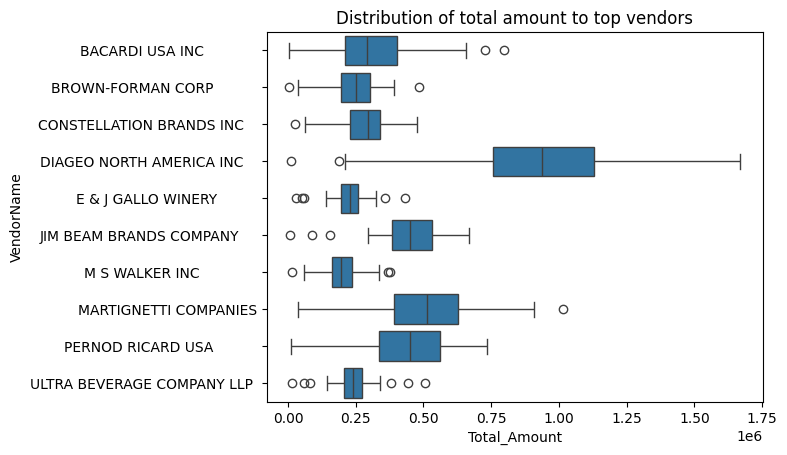

In [46]:
top_vendor_by_total_Amount = invoice_purchases.groupby(['VendorName'])['Total_Amount'].sum().sort_values(ascending= False).index[:10]
sns.boxplot(x = 'Total_Amount' , y = 'VendorName' , data = invoice_purchases[invoice_purchases['VendorName'].isin(top_vendor_by_total_Amount)])
plt.title('Distribution of total amount to top vendors')
plt.show()

In [47]:
top_10_brands = sales.groupby(['Description'])['Total Amount'].max().sort_values(ascending = False).index[:10]

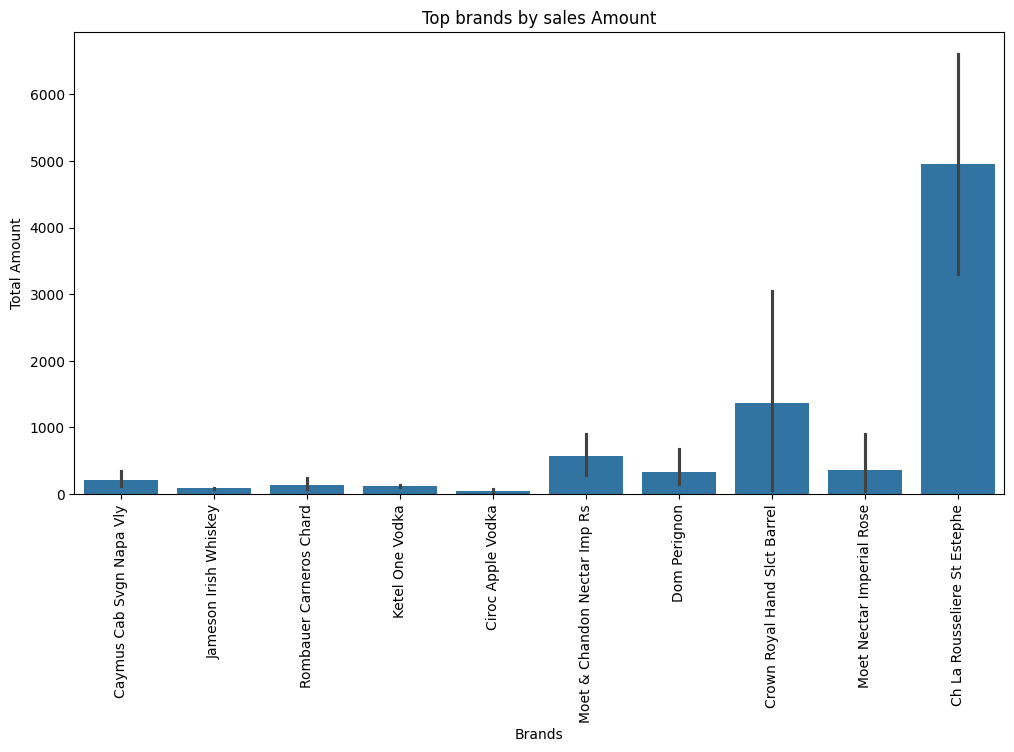

In [48]:
plt.figure(figsize = (12 , 6))
sns.barplot(x = 'Description' , y = 'Total Amount' , data = sales[sales['Description'].isin(top_10_brands)])
plt.title('Top brands by sales Amount')
plt.xlabel('Brands')
plt.ylabel('Total Amount')
plt.xticks(rotation = 'vertical')
plt.show()

In [66]:
max_quantity_vendor = purchases.groupby(['VendorName'])['Quantity'].max().sort_values(ascending= False)[:10]

In [62]:
max_quantity_vendor

VendorName
BACARDI USA INC                1080.0
JIM BEAM BRANDS COMPANY         819.0
DIAGEO NORTH AMERICA INC        780.0
SAZERAC CO INC                  704.0
PROXIMO SPIRITS INC.            632.0
E & J GALLO WINERY              604.0
MHW LTD                         479.0
BROWN-FORMAN CORP               383.0
MOET HENNESSY USA INC           360.0
PERNOD RICARD USA               324.0
Name: Quantity, dtype: float64

<ipython-input-71-2de45cd6981b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = max_quantity_vendor.index , y = max_quantity_vendor  ,data = invoice_purchases.head(10) , palette = 'magma')


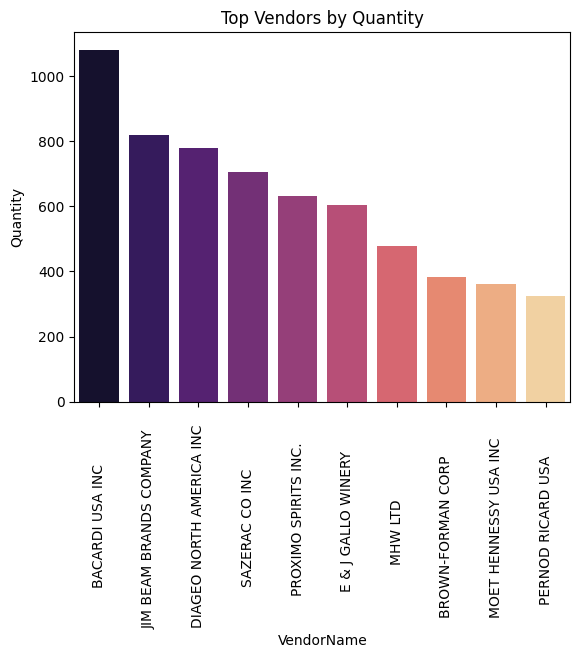

In [71]:
sns.barplot(x = max_quantity_vendor.index , y = max_quantity_vendor  ,data = invoice_purchases.head(10) , palette = 'magma')
plt.title('Top Vendors by Quantity')
plt.xticks(rotation = 'vertical')
plt.show()